# Cancer classifier using a convolutional neuronal network

In [2]:
#google drive import:
from google.colab import drive
import zipfile
import os

# 1. Google Drive mounten
drive.mount('/content/drive')

# 2. Pfade setzen
zip_path = '/content/drive/MyDrive/Kather_texture_2016_image_tiles_5000.zip'  # ZIP in deiner Ablage
extract_path = '/content/Kather_texture_2016_image_tiles_5000'  # Ziel zum Entpacken

# 3. Entpacken
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 4. Kontrolle: was ist drin?
print("Dateien entpackt nach:", extract_path)
print("Inhalt:", os.listdir(extract_path))

Mounted at /content/drive
Dateien entpackt nach: /content/Kather_texture_2016_image_tiles_5000
Inhalt: ['Kather_texture_2016_image_tiles_5000']


In [15]:
#import libraries
#!pip install matplotlib
#!pip install keras
#!pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.optimizers import SGD

### Define parameters

In [3]:
#The given pictures are of 150 px * 150px | 8 classes are given
img_size = (150, 150)
batch_size = 32
image_path = "Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000"

### Generate images rescaled

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    image_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    image_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 3504 images belonging to 8 classes.
Found 1496 images belonging to 8 classes.


### Define the CNN model


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3),padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu", padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation="relu", padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(train_gen.num_classes, activation="softmax")
])

opt = SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train the model

In [9]:
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    validation_data=val_gen,
    validation_steps=len(val_gen),
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 368s 3s/step - accuracy: 0.4681 - loss: 2.0022 - val_accuracy: 0.1250 - val_loss: 9.8050
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 375s 3s/step - accuracy: 0.6504 - loss: 1.0310 - val_accuracy: 0.1430 - val_loss: 9.1214
Epoch 3/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.6896 - loss: 0.9091 - val_accuracy: 0.1765 - val_loss: 7.9529
Epoch 4/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 363s 3s/step - accuracy: 0.7161 - loss: 0.8582 - val_accuracy: 0.3222 - val_loss: 5.4825
Epoch 5/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step - accuracy: 0.7153 - loss: 0.8514 - val_accuracy: 0.5829 - val_loss: 1.5500
Epoch 6/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 379s 3s/step - accuracy: 0.7591 - loss: 0.7556 - val_accuracy: 0.7894 - val_loss: 0.6990
Epoch 7/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 375s 3s/step - accuracy: 0.7045 - loss: 0.8497 - val_accuracy: 0.6925 - val_loss: 0.8499
Epoch 8/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 409s 3s/step - accuracy: 0.7677 - loss: 0.7073 - val_accu

### Evaluation

In [10]:
test_loss, test_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {test_acc:.2f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 776ms/step - accuracy: 0.7579 - loss: 0.7761
Validation Accuracy: 0.76


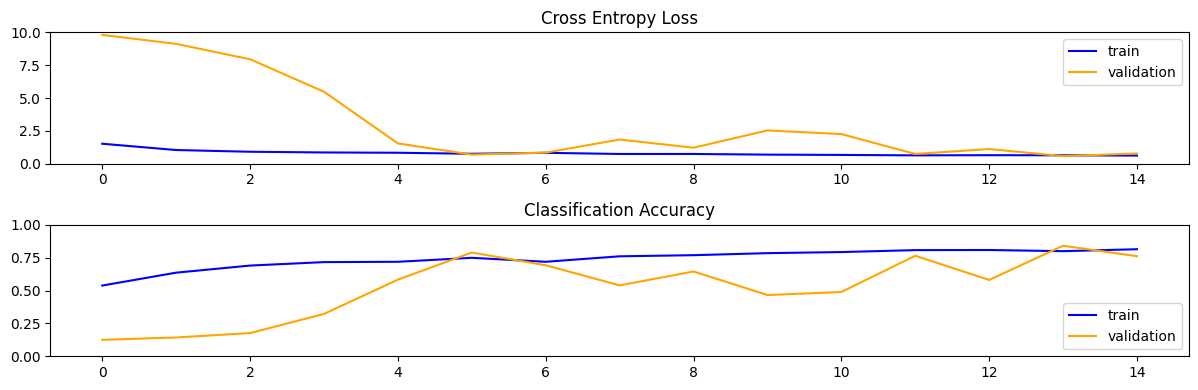

In [11]:
pyplot.figure(figsize=(12, 4))
# plot loss
pyplot.subplot(2, 1, 1)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='validation')
pyplot.ylim(0.0,10.0)
pyplot.legend()

# plot accuracy
pyplot.subplot(2,1,2)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='validation')
pyplot.legend()
pyplot.ylim(0.0,1.0)

pyplot.tight_layout()
pyplot.show()

### Sample prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


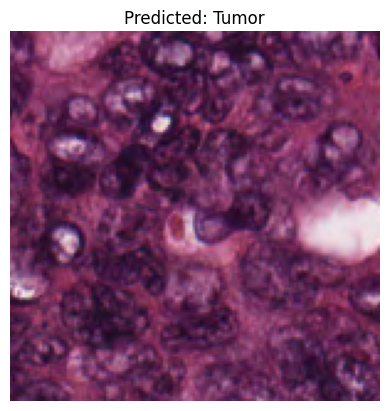

In [17]:
class_names = ['Tumor', 'Stroma', 'Complex', 'Lympho', 'Debris', 'Mucosa', 'Adipose', 'Empty']

img_path = "/content/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif"

#Load image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

#Predict
pred = model.predict(img_array)
pred_class = np.argmax(pred, axis=1)[0]
pred_label = class_names[pred_class]

#Plot
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title(f"Predicted: {pred_label}")
plt.show()